# Machine Learning with Pima Diabetes Dataset

### Importar Dataset

In [39]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('../datasets/diabetes.csv')

# get Age characteristic from dataset
ages = data['Age']

# remove the dependent characteristic
features = data.drop('Outcome', axis=1, inplace=True)

# Success
print('Boston housing dataset has {0} data points with {1} variables each'.format(*data.shape))

# show first 3 samples
data.head(3)

Boston housing dataset has 768 data points with 8 variables each


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


### Dataset Information

In [40]:
# show dataset info
data.info()

# show dataset statistical description
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### Calculate Statistics about price characteristic

In [41]:
# TODO: Minimum price of the data
minimum_price = np.min(ages)
# Alternative using pandas
# minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = np.max(ages)
# Alternative using pandas
# maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = np.mean(ages)
# Alternative using pandas
# mean_price = prices.mean()

# TODO: Median price of the data
median_price = np.median(ages)
# Alternative using pandas
# median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = np.std(ages)
# Alternative using pandas 
# std_price = prices.std(ddof=0)

# There are other statistics you can calculate too like quartiles
first_quartile = np.percentile(ages, 25)
third_quartile = np.percentile(ages, 75)
inter_quartile = third_quartile - first_quartile

# Show the calculated statistics
print("Statistics for Pima Diabetes dataset:\n")
print("Minimum age: {:d}".format(minimum_price))
print("Maximum age: {:d}".format(maximum_price))
print("Mean age: {:,.2f}".format(mean_price))
print("Median age {:,.2f}".format(median_price))
print("Standard deviation of agea: {:,.2f}".format(std_price))
print("First quartile of agea: {:,.2f}".format(first_quartile))
print("Second quartile of ages: {:,.2f}".format(third_quartile))
print("Interquartile (IQR) of ages: {:,.2f}".format(inter_quartile))

Statistics for Pima Diabetes dataset:

Minimum age: 21
Maximum age: 81
Mean age: 33.24
Median age 29.00
Standard deviation of agea: 11.75
First quartile of agea: 24.00
Second quartile of ages: 41.00
Interquartile (IQR) of ages: 17.00


### Distribution bell curve or normal distribution: Skew

In [42]:
# show degree of distortion of the distribution
#If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
#If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.
#If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.
data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64

### Check skew

Skew for Diabetes Pedigree Function is 1.919911066307204
Skew for Insulin corrected is 0.6222161053177417


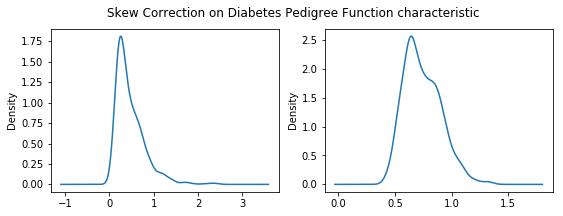

In [43]:
# get Diabetes Pedigree Function Series to be checked
dfDiabetesPedigreeFunction = data['DiabetesPedigreeFunction']
print('Skew for Diabetes Pedigree Function is ' + str(dfDiabetesPedigreeFunction.skew()))

# correct the positive skew about 1.919911 applying cube root
dfIDiabetesPedigreeFunctionC = np.power(data['DiabetesPedigreeFunction'], 1/3)
print('Skew for Insulin corrected is ' + str(dfIDiabetesPedigreeFunctionC.skew()))

# densitive distribution before and after correction
plt.figure(figsize=(9, 3))
plt.subplot(121)
dfInsulin.plot(kind='density')
plt.subplot(122)
dfIDiabetesPedigreeFunctionC.plot(kind='density')
plt.suptitle('Skew Correction on Diabetes Pedigree Function characteristic')
plt.show()

### Distribution bell curve or normal distribution: Kurtosis

In [44]:
# show tails of the distribution. Measure of outliers present in the distribution.
# Leptokurtic (Kurtosis > 3): Distribution is longer, tails are fatter. data are heavy-tailed or profusion of outliers
# Platykurtic: (Kurtosis < 3): tails are thinner than the normal distribution, data are light-tailed or lack of outliers
data.kurtosis()

Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
dtype: float64

### Histogram plot (univariate plots)

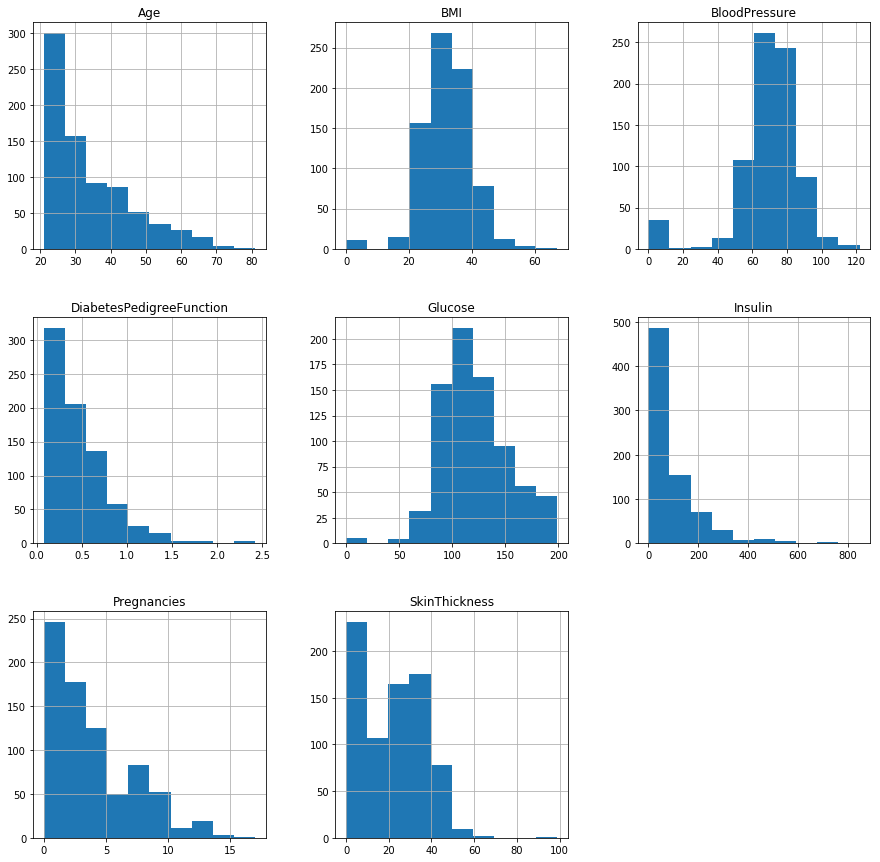

In [54]:
# Univariate Histogram Plots
fig = plt.figure(figsize=[15,15])
ax = fig.gca()
data.hist(ax=ax)

plt.show()

### Visualize density plot

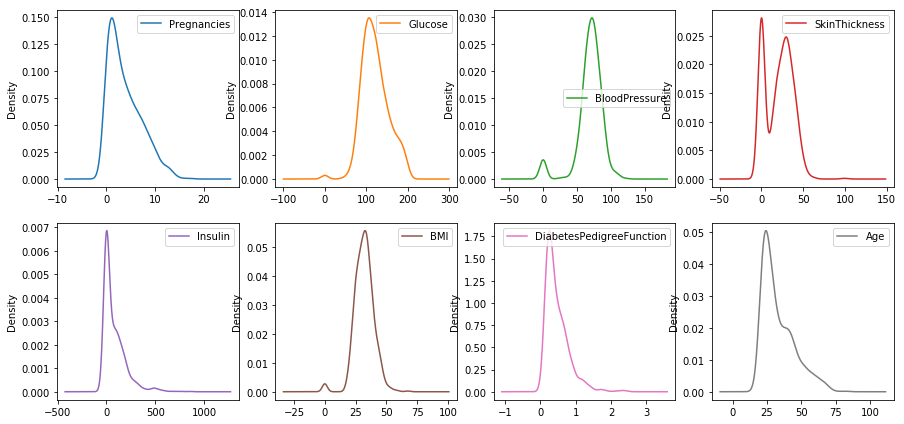

In [55]:
# Univariate Density Plots
fig = plt.figure(figsize=[15,15])
ax = fig.gca()

data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, ax=ax)

plt.show()

### Visualize Box and Whisker Plot

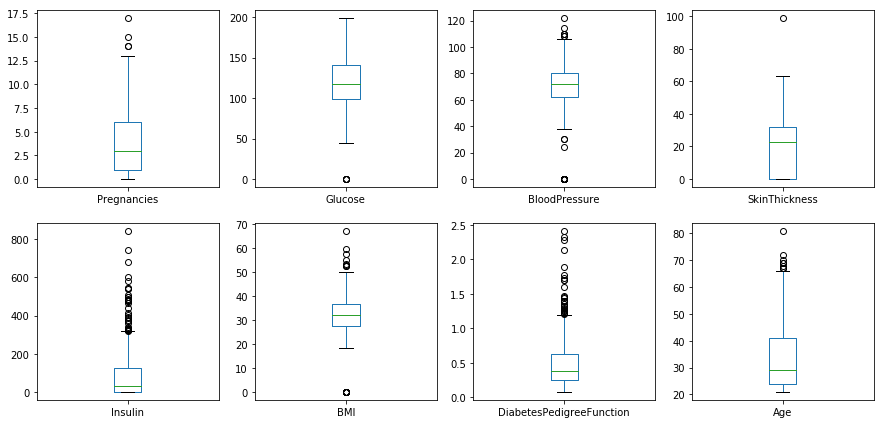

In [47]:
# Univariate Density Plots
fig = plt.figure(figsize=[15,15])
ax = fig.gca()

data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, ax=ax)

plt.show()

### Visualize correlate matrix (multivariate plot)

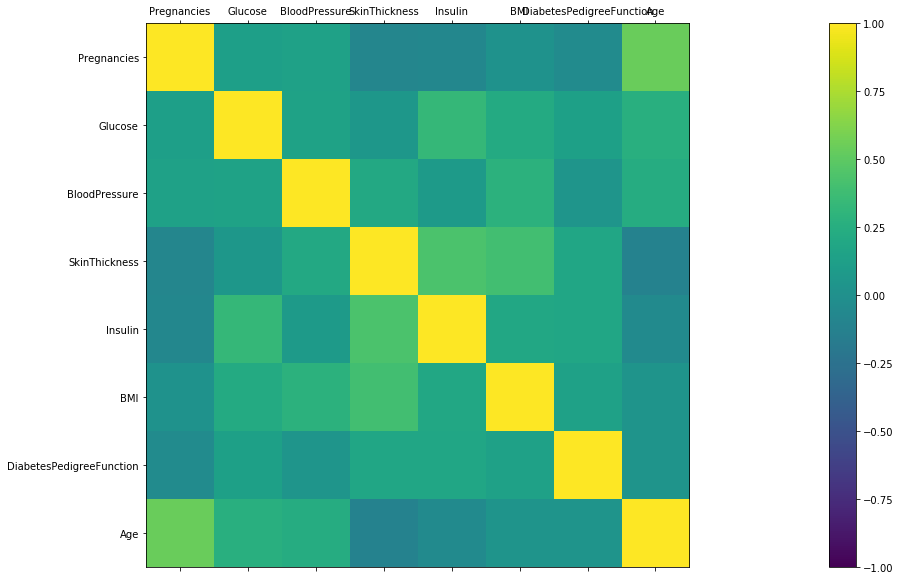

In [52]:
# correlation matrix
correlations = data.corr()

# plot correlation matrix¡
fig = plt.figure(figsize=(50, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(list(data.columns)),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()